<a href="https://colab.research.google.com/github/namratabiswas/Linear-Regression/blob/main/Linear_Regression_Pumpkin_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the data and cleaning it

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('/content/drive/MyDrive/US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


Checking for null cols

In [ ]:
pumpkins.isnull().sum()

,0
City Name,0
Type,1712
Package,0
Variety,5
Sub Variety,1461
Grade,1757
Date,0
Low Price,0
High Price,0
Mostly Low,103


Extracting month from date col

In [ ]:
pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month

In [ ]:
pumpkins.head(5)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25,Month
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,4
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN,5
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,9
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,9
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,11


Selecting only necessary cols

In [ ]:
cols_to_select = ['Package','Date','Low Price','High Price','Month','Variety']
pumpkins = pumpkins.loc[:,cols_to_select]
pumpkins.head(5)

,Package,Date,Low Price,High Price,Month,Variety
0,24 inch bins,4/29/17,270.0,280.0,4,NaN
1,24 inch bins,5/6/17,270.0,280.0,5,NaN
2,24 inch bins,9/24/16,160.0,160.0,9,HOWDEN TYPE
3,24 inch bins,9/24/16,160.0,160.0,9,HOWDEN TYPE
4,24 inch bins,11/5/16,90.0,100.0,11,HOWDEN TYPE


selecting only pumpkins with the string 'bushel' in their Package column. So to Normalize the data

In [ ]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head(5)

,Package,Date,Low Price,High Price,Month,Variety
70,1 1/9 bushel cartons,9/24/16,15.0,15.0,9,PIE TYPE
71,1 1/9 bushel cartons,9/24/16,18.0,18.0,9,PIE TYPE
72,1 1/9 bushel cartons,10/1/16,18.0,18.0,10,PIE TYPE
73,1 1/9 bushel cartons,10/1/16,17.0,17.0,10,PIE TYPE
74,1 1/9 bushel cartons,10/8/16,15.0,15.0,10,PIE TYPE


In [ ]:
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9')]

pumpkins.loc[pumpkins['Package'].str.contains('1/2')]

,Package,Date,Low Price,High Price,Month,Variety
123,1/2 bushel cartons,9/24/16,18.00,18.0,9,MINIATURE
124,1/2 bushel cartons,9/24/16,15.00,15.0,9,MINIATURE
125,1/2 bushel cartons,10/1/16,18.00,18.0,10,MINIATURE
126,1/2 bushel cartons,10/1/16,15.00,15.0,10,MINIATURE
127,1/2 bushel cartons,10/1/16,17.00,17.0,10,MINIATURE
...,...,...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0,9,MINIATURE
1739,1/2 bushel cartons,9/30/16,13.75,15.0,9,MINIATURE
1740,1/2 bushel cartons,9/30/16,10.75,15.0,9,MINIATURE
1741,1/2 bushel cartons,9/30/16,12.00,12.0,9,MINIATURE


In [ ]:
pumpkins['Price'] = pumpkins['High Price']+pumpkins['Low Price']/2
pumpkins.head()

,Package,Date,Low Price,High Price,Month,Variety,Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0,9,PIE TYPE,22.5
71,1 1/9 bushel cartons,9/24/16,18.0,18.0,9,PIE TYPE,27.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0,10,PIE TYPE,27.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0,10,PIE TYPE,25.5
74,1 1/9 bushel cartons,10/8/16,15.0,15.0,10,PIE TYPE,22.5


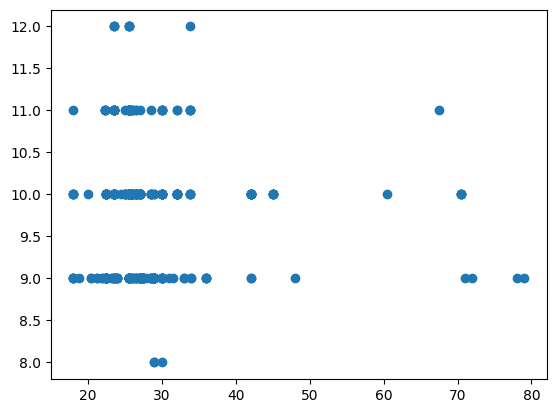

In [ ]:
import matplotlib.pyplot as plt
price = pumpkins.Price
month = pumpkins.Month
plt.scatter(price, month)
plt.show()

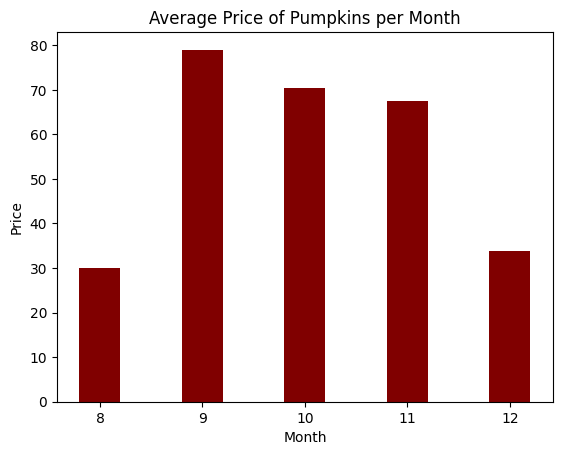

In [ ]:
price = pumpkins.Price
month = pumpkins.Month
plt.bar(month, price, color ='maroon',
        width = 0.4)

plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Average Price of Pumpkins per Month")
plt.show()

When is the best time to buy pumpkins?
What price can I expect of a case of miniature pumpkins?
Should I buy them in half-bushel baskets or by the 1 1/9 bushel box? Let's keep digging into this data.
considering other factors or variables like TYPE of pumpkins and DAY OF THE YEAR

In [ ]:
from datetime import datetime

#YEAR, MONTH, DAY = 2023, 2, 7

pumpkins['day_of_year'] = pd.DatetimeIndex(pumpkins['Date']).dayofyear
pumpkins.head()

,Package,Date,Low Price,High Price,Month,Variety,Price,day_of_year
70,1 1/9 bushel cartons,9/24/16,15.0,15.0,9,PIE TYPE,22.5,268
71,1 1/9 bushel cartons,9/24/16,18.0,18.0,9,PIE TYPE,27.0,268
72,1 1/9 bushel cartons,10/1/16,18.0,18.0,10,PIE TYPE,27.0,275
73,1 1/9 bushel cartons,10/1/16,17.0,17.0,10,PIE TYPE,25.5,275
74,1 1/9 bushel cartons,10/8/16,15.0,15.0,10,PIE TYPE,22.5,282


In [ ]:
# checking correlation using .corr function
print(pumpkins['Month'].corr(pumpkins['Price']))

-0.03812365610690544


 It looks like there are different clusters of prices corresponding to different pumpkin varieties. To confirm this hypothesis, let's plot each pumpkin category using a different color. By passing an ax parameter to the scatter plotting function we can plot all points on the same graph:

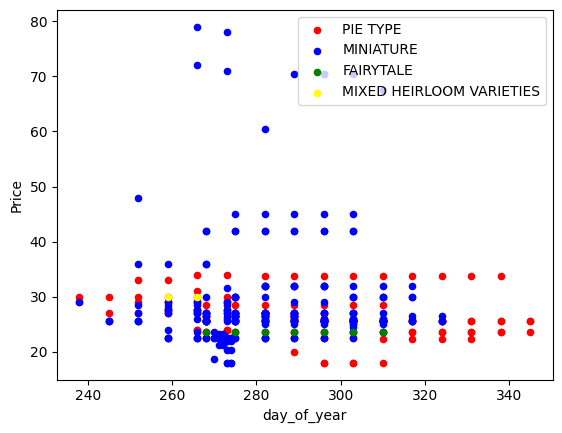

In [ ]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(pumpkins['Variety'].unique()):
    df = pumpkins[pumpkins['Variety']==var]
    ax = df.plot.scatter('day_of_year','Price',ax=ax,c=colors[i],label=var)

Our investigation suggests that variety has more effect on the overall price than the actual selling date. We can see this with a bar graph:

<Axes: xlabel='Variety'>

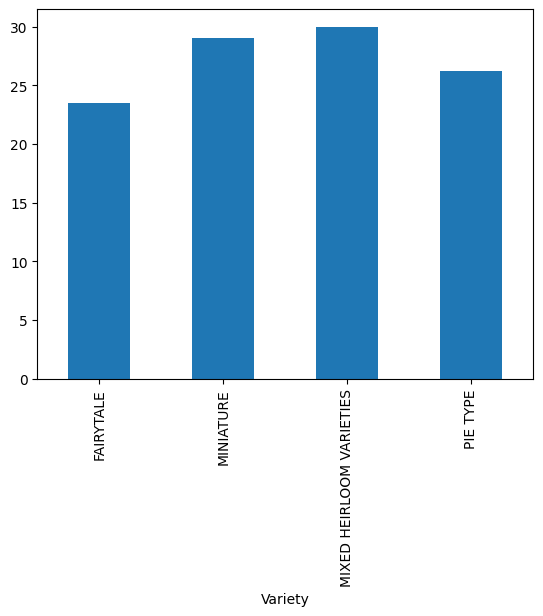

In [ ]:
pumpkins.groupby('Variety')['Price'].mean().plot(kind = 'bar')

In [ ]:
print(pumpkins['day_of_year'].corr(pumpkins['Price']))

-0.049048157399706284


Applying Linear regression
First cleaning the data

In [ ]:
pumpkins.dropna(inplace=True)
pumpkins.info()


<class 'pandas.core.frame.DataFrame'>
Index: 415 entries, 70 to 1742
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Package      415 non-null    object 
 1   Date         415 non-null    object 
 2   Low Price    415 non-null    float64
 3   High Price   415 non-null    float64
 4   Month        415 non-null    int32  
 5   Variety      415 non-null    object 
 6   Price        415 non-null    float64
 7   day_of_year  415 non-null    int32  
dtypes: float64(3), int32(2), object(3)
memory usage: 42.1+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
X = pumpkins['day_of_year'].to_numpy().reshape(-1,1)
y = pumpkins['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = lin_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 10.5 (37.9%)


In [ ]:
# Coeficient of determination
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.00556092904943728


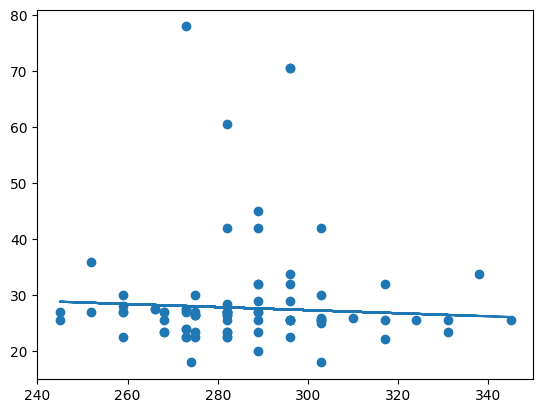

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

Polynomail regression- more featuresand coefficients

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(3), LinearRegression())
#pipeline.fit_transform(X.reshape(-1, 1))
pipeline.fit(X_train,y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [ ]:
pred= pipeline.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 10.5 (37.9%)


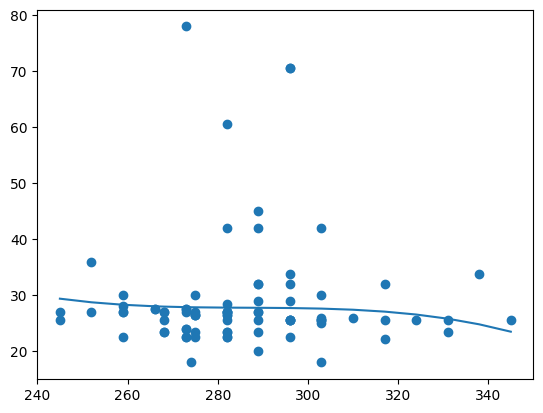

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(sorted(X_test),pipeline.predict(sorted(X_test)))

In [ ]:
score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.00801895345299386


Using Polynomial Regression, we can get slightly lower MSE and higher determination, but not significantly. We need to take into account other features!

Using Categorical Features: since they are not numerical we will us eONE HOT ENCODING to get binary values of them

In [ ]:
pd.get_dummies(pumpkins['Variety'],dtype='int')

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


In [ ]:
X = pd.get_dummies(pumpkins['Variety'])
y = pumpkins['Price']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = lin_reg.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 10.3 (37.3%)


In [ ]:
# Coeficient of determination
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.01968931119829187


To get even more accurate predictions, we can take more categorical features into account

In [ ]:
# set up training data
X = pd.get_dummies(pumpkins['Variety']) \
        .join(pumpkins['Month']) \
        .join(pd.get_dummies(pumpkins['Package']))
y = pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 3.25 (11.2%)
Model determination:  0.8494682480763789
